In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('./data/boston_airbnb/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
#number of rows and columns, and all the column names
print(df.shape)
print(df.columns)

(3585, 95)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       '

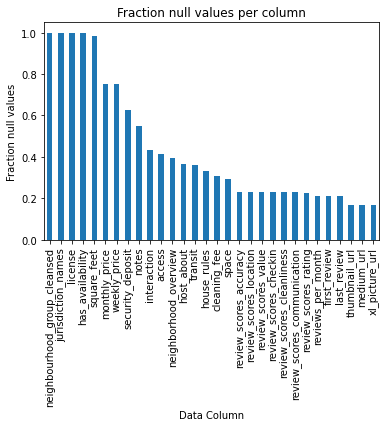

In [20]:
#plot fractions of null values per column - determine cut off point for columns to drop
vals = df.isnull().mean().sort_values(ascending=False)
(vals[:30]).plot(kind="bar", title="Fraction null values per column", xlabel="Data Column", ylabel="Fraction null values");

In [23]:
#columns with more than 50% missing values
missing_cols = set(df.columns[df.isnull().mean()>0.5])
print(missing_cols)

{'monthly_price', 'square_feet', 'jurisdiction_names', 'license', 'notes', 'security_deposit', 'neighbourhood_group_cleansed', 'has_availability', 'weekly_price'}


In [24]:
#remove columns with more than 50% missing values
df1 = df.drop(missing_cols, axis=1, inplace=False)
print(df1.shape)

(3585, 86)


In [9]:
#replace "$" sign in price column, convert to numeric
df2 = df1.copy()

print(df2['price'].head())

df2['price'] =  df2['price'].replace({'\$':''}, regex = True)
df2['price'] =  pd.to_numeric(df2['price'] ,errors='coerce')

print(df2['price'].head())

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object
0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64


In [10]:
#determine what fraction of prices are null
print(df2.shape)
print(df2['price'].isnull().mean())

(3585, 86)
0.0033472803347280333


In [11]:
#drop rows with null prices
df3 = df2.dropna(subset=['price'], axis=0)
print(df3.shape)
print(df3['price'].isnull().mean())

(3573, 86)
0.0


In [12]:
#get price column statistics
df3['price'].describe()

count    3573.000000
mean      169.072768
std       111.677022
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max       999.000000
Name: price, dtype: float64

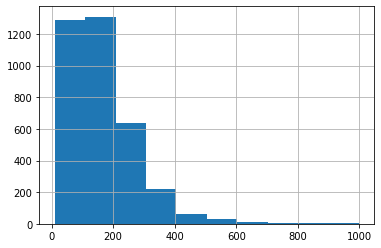

In [19]:
#get price column histogram
df3['price'].hist();

In [11]:
#drop rows with prices more than $400
df4 = df3[df3['price']<=400]
print(df4.shape)

(3459, 86)


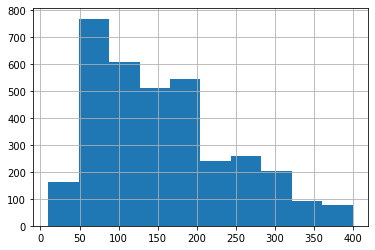

In [12]:
#get price column histogram
df4['price'].hist();